In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib_2 as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib_2' from 'C:\\Users\\Saad J\\Desktop\\epri\\myepri\\Task2\\NB\\NB_data_modelling\\epri_mc_lib_2.py'>

In [2]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../../Data/Merged_data/MERGE_FT_TEP_UT_on_ID.csv'),
                    index_col=0)

sampled_df=pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../../Data/Merged_data/CopulaGAN_simulated_data.csv'))

In [3]:
data.index = data.index.str.rstrip('-12345')

In [4]:
mean_df = data.groupby('ID').mean()
mean_df.dropna(how='any', inplace=True)
mean_df['type_cw'] = mean_df.index.astype('str')

In [5]:
mean_df.head()

,KJIC,MS_Avg,MS_neg_error,MS_pos_error,TEP_average,TEP_error,Beta_avg,PC_IF_2.25MHz,SE_IF_2.25MHz,SE_%_IF_2.25MHz,PC_IF_3.5MHz,SE_IF_3.5MHz,SE_%_IF_3.5MHz,PC_BS,type_cw
ID,,,,,,,,,,,,,,,
304-0,162.000,0.120,0.0350,0.0860,-1.547,0.04900,0.002743,0.0,0.013,2.9,0.0,0.005,1.3,0.0,304-0
304-20,105.780,0.496,0.1770,0.2390,-1.322,0.06300,0.002093,50.0,0.014,2.0,59.0,0.006,1.1,-12.0,304-20
304-40,100.700,1.350,0.3770,0.3770,-1.216,0.05300,0.001941,57.0,0.022,3.0,79.0,0.012,1.9,-20.0,304-40
304-60,91.320,1.371,0.5310,0.9090,-1.249,0.05200,0.002567,98.0,0.010,1.1,139.0,0.015,1.7,3.0,304-60
304-80,73.775,3.966,1.3495,2.4765,-0.976,0.06425,0.002420,94.0,0.024,2.7,149.0,0.021,2.4,10.0,304-80


In [6]:
short_mean = mean_df.loc[:, ['KJIC', 'MS_Avg', 'TEP_average',
        'Beta_avg', 'PC_IF_2.25MHz', 'PC_IF_3.5MHz',
       'PC_BS', 'type_cw']]

In [7]:
short_mean.head()

,KJIC,MS_Avg,TEP_average,Beta_avg,PC_IF_2.25MHz,PC_IF_3.5MHz,PC_BS,type_cw
ID,,,,,,,,
304-0,162.000,0.120,-1.547,0.002743,0.0,0.0,0.0,304-0
304-20,105.780,0.496,-1.322,0.002093,50.0,59.0,-12.0,304-20
304-40,100.700,1.350,-1.216,0.001941,57.0,79.0,-20.0,304-40
304-60,91.320,1.371,-1.249,0.002567,98.0,139.0,3.0,304-60
304-80,73.775,3.966,-0.976,0.002420,94.0,149.0,10.0,304-80


In [8]:
sampled_df

,KJIC,MS_Avg,MS_neg_error,MS_pos_error,TEP_average,TEP_error,Beta_avg,PC_IF_2.25MHz,SE_IF_2.25MHz,SE_%_IF_2.25MHz,PC_IF_3.5MHz,SE_IF_3.5MHz,SE_%_IF_3.5MHz,PC_BS,type_cw,Type
0,60.489458,0.010580,0.002000,0.002000,-1.409903,0.046787,0.002109,3.640283e+02,0.025513,2.594648,184.875799,0.018969,1.705626,-62.977927,A286-80,A286
1,44.261992,0.013681,0.002000,0.002000,-1.508575,0.046089,0.001903,4.615413e+02,0.022798,1.890054,901.546526,0.022046,1.504480,-64.434818,A286-80,A286
2,156.352240,0.014511,0.002000,0.002000,-1.220520,0.045382,0.002143,9.688812e-13,0.008521,3.973307,47.009106,0.002548,1.640369,-0.455673,A286-0,A286
3,70.025254,4.788344,2.131362,2.820919,-1.055187,0.067237,0.002424,8.023317e+01,0.027521,3.165900,158.586692,0.024863,3.235830,-8.051534,304-80,304
4,102.089063,1.070462,0.821760,1.754141,-1.201403,0.052497,0.001934,4.029531e+01,0.022566,2.870203,637.420387,0.012983,5.242440,-36.263322,304-40,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,96.533556,0.338549,0.179534,0.225540,-1.261545,0.056277,0.002174,1.350067e+02,0.006515,1.112177,238.429845,0.023679,1.824403,-36.890105,347-40,347
996,71.566934,0.009250,0.002000,0.002000,-1.150631,0.044825,0.002063,6.842860e+02,0.022014,1.675595,1292.052416,0.011407,0.373688,-28.171811,A286-20,A286
997,81.170931,3.926854,2.239491,3.551210,-0.930937,0.067434,0.002443,8.748498e+01,0.023465,3.085555,139.648195,0.018672,2.814763,2.662860,304-80,304
998,64.209348,0.009250,0.002000,0.002000,-1.248021,0.044754,0.002108,6.734629e+02,0.023711,1.461942,1233.343218,0.015022,0.890019,-28.758294,A286-20,A286


### Boxplots for real and sampled data

In [9]:
data1 = short_mean[['KJIC','MS_Avg','TEP_average','Beta_avg','PC_IF_2.25MHz','PC_IF_3.5MHz','PC_BS']].assign(Location="Real_Data")
data2 = sampled_df[['KJIC','MS_Avg','TEP_average','Beta_avg','PC_IF_2.25MHz','PC_IF_3.5MHz','PC_BS']].assign(Location="Simulated_Data")

In [10]:
cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])
print(mdf)

            Location Feature       value
0          Real_Data    KJIC  162.000000
1          Real_Data    KJIC  105.780000
2          Real_Data    KJIC  100.700000
3          Real_Data    KJIC   91.320000
4          Real_Data    KJIC   73.775000
...              ...     ...         ...
7128  Simulated_Data   PC_BS  -36.890105
7129  Simulated_Data   PC_BS  -28.171811
7130  Simulated_Data   PC_BS    2.662860
7131  Simulated_Data   PC_BS  -28.758294
7132  Simulated_Data   PC_BS  -68.999999

[7133 rows x 3 columns]


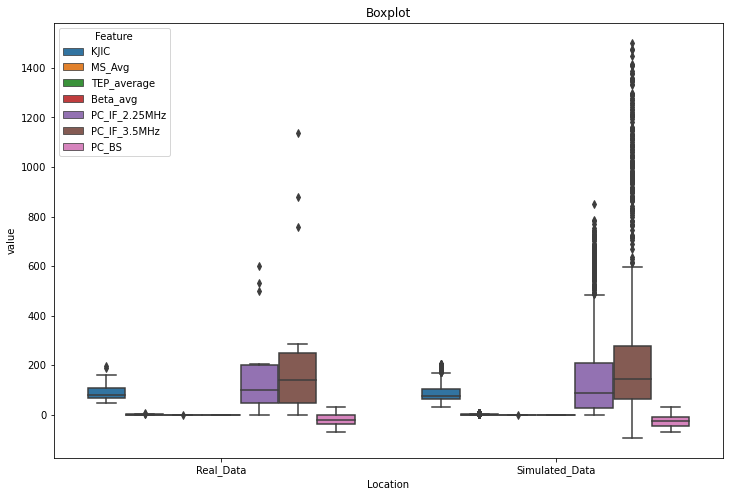

In [11]:
fig= plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="Location", y="value", hue="Feature", data=mdf)    
plt.title('Boxplot')
plt.show()

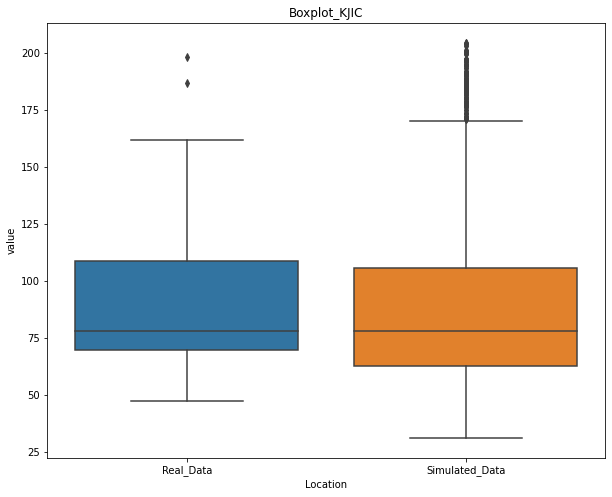

In [12]:
data1 = mean_df[['KJIC']].assign(Location="Real_Data")
data2 = sampled_df[['KJIC']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('Boxplot_KJIC')
plt.show()

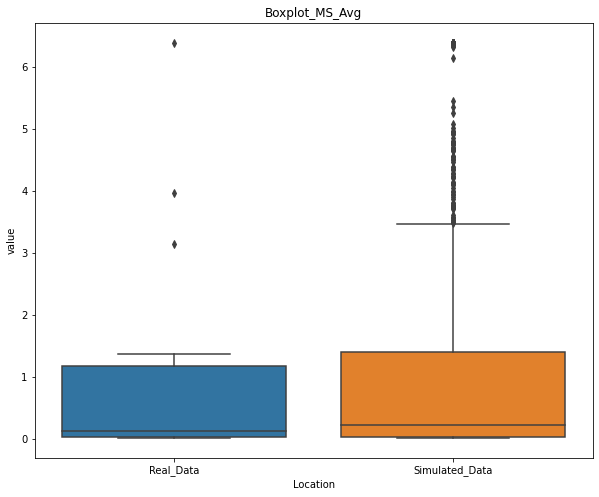

In [13]:
data1 = mean_df[['MS_Avg']].assign(Location="Real_Data")
data2 = sampled_df[['MS_Avg']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('Boxplot_MS_Avg')
plt.show()

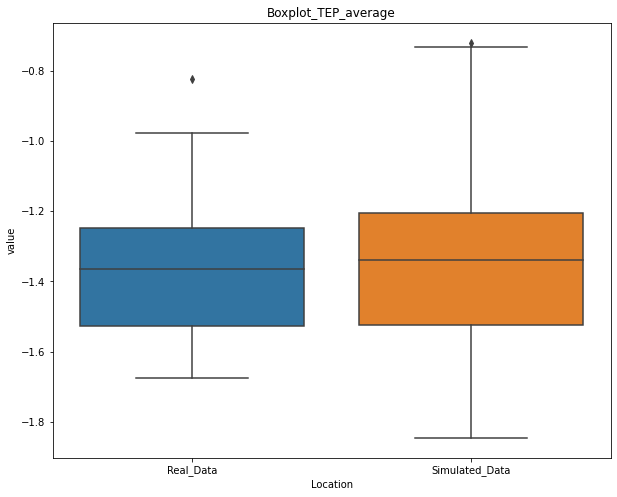

In [14]:
data1 = mean_df[['TEP_average']].assign(Location="Real_Data")
data2 = sampled_df[['TEP_average']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('Boxplot_TEP_average')
plt.show()

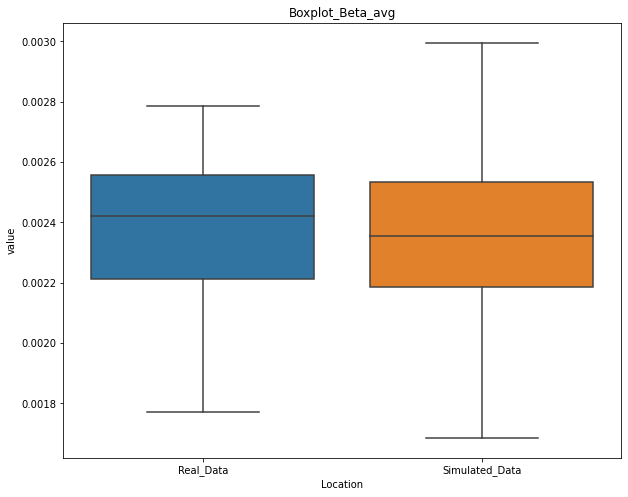

In [15]:
data1 = mean_df[['Beta_avg']].assign(Location="Real_Data")
data2 = sampled_df[['Beta_avg']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('Boxplot_Beta_avg')
plt.show()

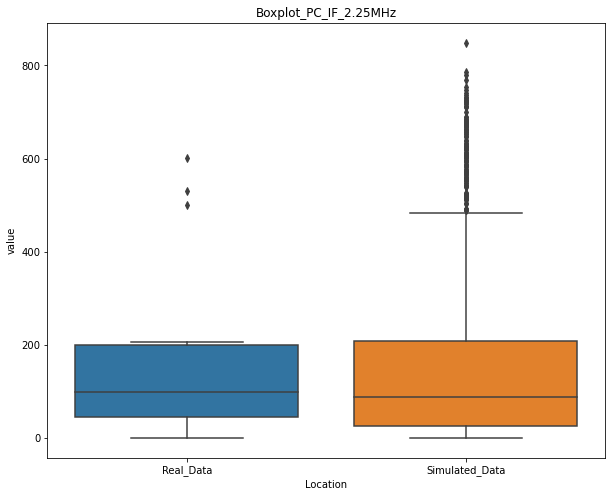

In [16]:
data1 = mean_df[['PC_IF_2.25MHz']].assign(Location="Real_Data")
data2 = sampled_df[['PC_IF_2.25MHz']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('Boxplot_PC_IF_2.25MHz')
plt.show()

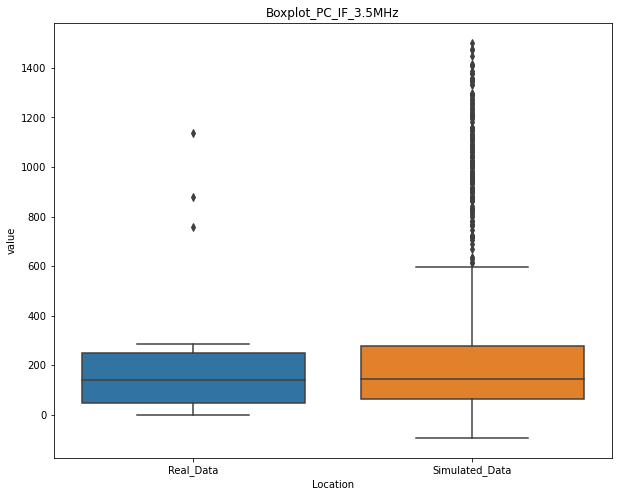

In [17]:
data1 = mean_df[['PC_IF_3.5MHz']].assign(Location="Real_Data")
data2 = sampled_df[['PC_IF_3.5MHz']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('Boxplot_PC_IF_3.5MHz')
plt.show()

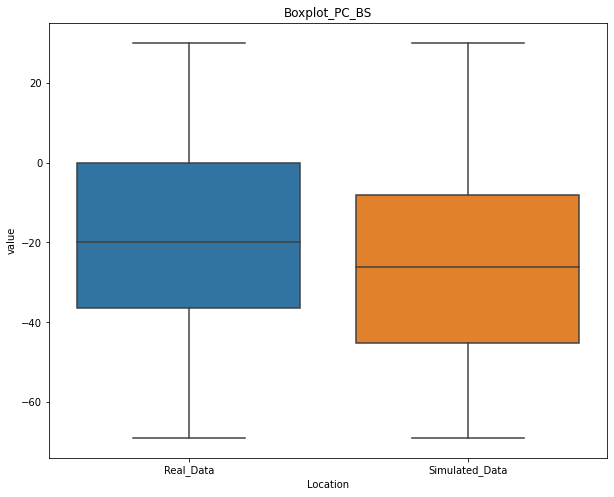

In [18]:
data1 = mean_df[['PC_BS']].assign(Location="Real_Data")
data2 = sampled_df[['PC_BS']].assign(Location="Simulated_Data")

cdf = pd.concat([data1, data2])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Feature'])

fig= plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('Boxplot_PC_BS')
plt.show()

### Scatter plots 

<Figure size 720x432 with 0 Axes>

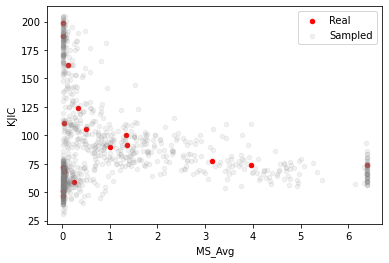

<Figure size 720x432 with 0 Axes>

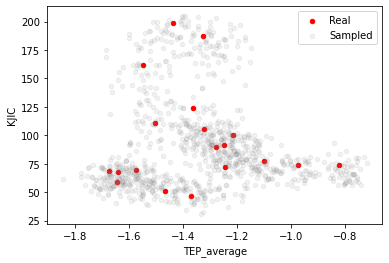

<Figure size 720x432 with 0 Axes>

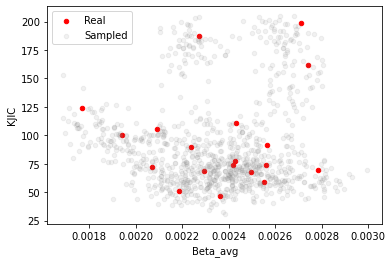

<Figure size 720x432 with 0 Axes>

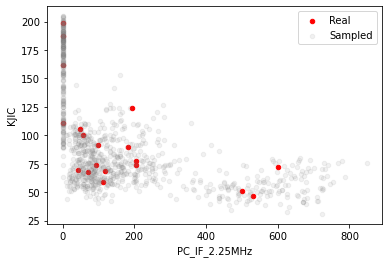

<Figure size 720x432 with 0 Axes>

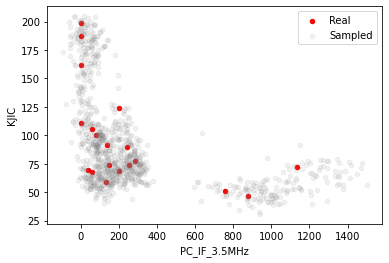

<Figure size 720x432 with 0 Axes>

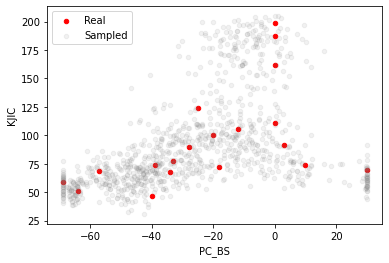

In [22]:


fig= plt.figure(figsize=(10, 6))
ax1 = short_mean.plot(kind='scatter', x='MS_Avg', y='KJIC', color='r', label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='MS_Avg', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1)    
plt.show()

fig= plt.figure(figsize=(10, 6))
ax1 = mean_df.plot(kind='scatter', x='TEP_average', y='KJIC', color='r',label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='TEP_average', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1)  
plt.show()

fig= plt.figure(figsize=(10, 6))
ax1 = mean_df.plot(kind='scatter', x='Beta_avg', y='KJIC', color='r', label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='Beta_avg', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1)  
plt.show()

fig= plt.figure(figsize=(10, 6))
ax1 = mean_df.plot(kind='scatter', x='PC_IF_2.25MHz', y='KJIC', color='r', label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='PC_IF_2.25MHz', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1) 
plt.show()

fig= plt.figure(figsize=(10, 6))
ax1 = mean_df.plot(kind='scatter', x='PC_IF_3.5MHz', y='KJIC', color='r', label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='PC_IF_3.5MHz', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1) 
plt.show()

fig= plt.figure(figsize=(10, 6))
ax1 = mean_df.plot(kind='scatter', x='PC_BS', y='KJIC', color='r', label="Real")    
ax2 = sampled_df.plot(kind='scatter', x='PC_BS', y='KJIC', color='tab:gray', label="Sampled", ax=ax1, alpha=0.1) 
plt.show()
